# Code for presentation of 18th January

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
from meteo_imp.kalman.filter import *
import torch
import numpy as np
from meteo_imp.kalman.fastai import *
from meteo_imp.kalman.fastai import plot_variable
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from pyprojroot import here

In [ ]:
n_obs = 20
base_dir = here("presentations/plots_18_jan")
base_dir.mkdir(exist_ok=True)

In [ ]:
def save_plot(p, path):
    f_name = base_dir / (path + ".vl.json")
    with open(f_name, 'w') as f:
        f.write(p.to_json())
    return f_name

In [ ]:
plt_props = {'width': 460, 'height': 400}

## Only state

$$ x_t = A\color{blue}{x_{-1}} + \varepsilon$$

In [ ]:
torch.tensor([[0.]]).shape

torch.Size([1, 1])

In [ ]:
k0 = KalmanFilter(
    trans_matrix = torch.tensor([1.]),
    obs_matrix = torch.tensor([0.]),        
    contr_matrix = torch.tensor([0.]),
    trans_cov = torch.tensor([[.3]]),
    obs_cov = torch.tensor([[0.1]]),
    trans_off = torch.tensor([0.]),
    obs_off = torch.tensor([0.]),
    init_state_mean = torch.tensor([0.]),
    init_state_cov = torch.tensor([[0.01]]),
)

In [ ]:
pred0 = k0.smooth(torch.ones(1,n_obs,1), torch.zeros(1,n_obs,1, dtype=bool), torch.zeros(1,n_obs,1))

In [ ]:
time = pd.Index(range(n_obs), name="time")

In [ ]:
pred0.cov.shape

torch.Size([1, 20, 1, 1])

In [ ]:
pred0_df = NormalsDf(pd.DataFrame(pred0.mean.squeeze(0), index=time, columns=["state"]),
                     pd.DataFrame(pred0.cov.squeeze(0).squeeze(-1), index=time, columns=["state"]))

In [ ]:
p0 = facet_variable(pred0_df.tidy(), ys=["mean", "mean"], error=True, point=False, gap_area=False, props=plt_props)
p0

alt.VConcatChart(...)

In [ ]:
save_plot(p0, "only_state")

Path('/home/simone/Documents/uni/Thesis/GPFA_imputation/presentations/plots_18_jan/only_state.vl.json')

## Observations

In [ ]:
torch.tensor([[0.]]).shape

torch.Size([1, 1])

In [ ]:
k1 = KalmanFilter(
    trans_matrix = torch.tensor([1.]),
    obs_matrix = torch.tensor([1.]),        
    contr_matrix = torch.tensor([0.]),
    trans_cov = torch.tensor([[.5]]),
    obs_cov = torch.tensor([[0.3]]),
    trans_off = torch.tensor([0.]),
    obs_off = torch.tensor([0.]),
    init_state_mean = torch.tensor([0.]),
    init_state_cov = torch.tensor([[0.001]]),
)

In [ ]:
obs = 2 * torch.sin(torch.arange(n_obs) * 2 * torch.pi / (n_obs-2))

[<matplotlib.lines.Line2D>]

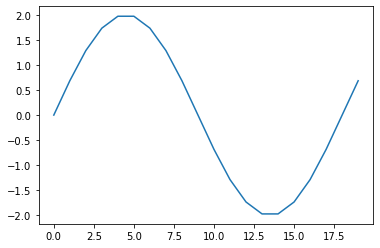

In [ ]:
plt.plot(obs)

In [ ]:
mask1 = torch.ones(1,n_obs,1, dtype=bool)

In [ ]:
pred1 = k1.smooth(obs.unsqueeze(0).unsqueeze(-1), mask1, torch.zeros(1,n_obs,1))

In [ ]:
time = pd.Index(range(n_obs), name="time")

In [ ]:
pred1.cov.shape

torch.Size([1, 20, 1, 1])

In [ ]:
pred_df1 = NormalsDf(pd.DataFrame(pred1.mean.squeeze(0), index=time, columns=["var"]),
                     pd.DataFrame(pred1.cov.squeeze(0).squeeze(-1), index=time, columns=["var"])).tidy()

In [ ]:
obs_df1 = pd.DataFrame({'time': time, 'var': obs.numpy(),
                        'is_present': mask1[0,:,0].numpy()}).melt(["time", "is_present"]) 

In [ ]:
plot_df1 = pd.merge(obs_df1, pred_df1, on=['time', 'variable'])

In [ ]:
p1 = facet_variable(plot_df1, ys=["value", "mean"], error=True, gap_area=False, props=plt_props)
p1

alt.VConcatChart(...)

In [ ]:
save_plot(p1, "obs")

Path('/home/simone/Documents/uni/Thesis/GPFA_imputation/presentations/plots_18_jan/obs.vl.json')

## Gaps

In [ ]:
k2 = KalmanFilter(
    trans_matrix = torch.tensor([1.]),
    obs_matrix = torch.tensor([1.]),        
    contr_matrix = torch.tensor([0.]),
    trans_cov = torch.tensor([[.5]]),
    obs_cov = torch.tensor([[0.3]]),
    trans_off = torch.tensor([0.]),
    obs_off = torch.tensor([0.]),
    init_state_mean = torch.tensor([0.]),
    init_state_cov = torch.tensor([[0.001]]),
)

In [ ]:
mask2 = torch.ones(1,n_obs,1, dtype=bool)
mask2[0,11:16,0] = False
mask2

tensor([[[ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [False],
         [False],
         [False],
         [False],
         [False],
         [ True],
         [ True],
         [ True],
         [ True]]])

In [ ]:
pred2 = k2.smooth(obs.unsqueeze(0).unsqueeze(-1), mask2, torch.zeros(1,n_obs,1))

In [ ]:
pred_df2 = NormalsDf(pd.DataFrame(pred2.mean.squeeze(0), index=time, columns=["var"]),
                     pd.DataFrame(pred2.cov.squeeze(0).squeeze(-1), index=time, columns=["var"])).tidy()

In [ ]:
obs_df2 = pd.DataFrame({'time': time, 'var': obs.numpy(),
                        'is_present': mask2[0,:,0].numpy()}).melt(["time", "is_present"]) 

In [ ]:
plot_df2 = pd.merge(obs_df2, pred_df2, on=['time', 'variable'])

In [ ]:
p2 = facet_variable(plot_df2, ys=["value", "mean"], error=True, gap_area=False, props={'width': 750, 'height': 500})
p2

alt.VConcatChart(...)

In [ ]:
save_plot(p2, "gaps")

Path('/home/simone/Documents/uni/Thesis/GPFA_imputation/presentations/plots_18_jan/gaps.vl.json')

## Control

In [ ]:
k3 = KalmanFilter(
    trans_matrix = torch.tensor([1.]),
    obs_matrix = torch.tensor([1.]),        
    contr_matrix = torch.tensor([-1., 1]),
    trans_cov = torch.tensor([[.5]]),
    obs_cov = torch.tensor([[0.3]]),
    trans_off = torch.tensor([0.]),
    obs_off = torch.tensor([0.]),
    init_state_mean = torch.tensor([0.]),
    init_state_cov = torch.tensor([[0.001]]),
)

In [ ]:
mask3 = torch.ones(1,n_obs,1, dtype=bool)
mask3[0,11:16,0] = False
mask3

tensor([[[ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [ True],
         [False],
         [False],
         [False],
         [False],
         [False],
         [ True],
         [ True],
         [ True],
         [ True]]])

In [ ]:
contr = torch.stack([(obs + 0.5)*1.2, ((obs + 0.5)*1.2).roll(-1)], dim=-1)

In [ ]:
contr.shape

torch.Size([20, 2])

[<matplotlib.lines.Line2D>]

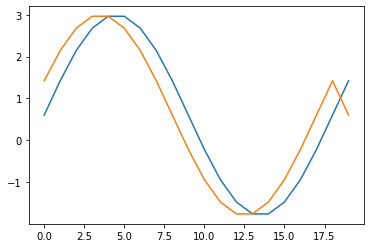

In [ ]:
plt.plot(contr[:,0])
plt.plot(contr[:,1])

In [ ]:
pred3 = k3.smooth(obs.unsqueeze(0).unsqueeze(-1), mask3, contr.unsqueeze(0))

In [ ]:
pred_df3 = NormalsDf(pd.DataFrame(pred3.mean.squeeze(0), index=time, columns=["var"]),
                     pd.DataFrame(pred3.cov.squeeze(0).squeeze(-1), index=time, columns=["var"])).tidy()

In [ ]:
obs_df3 = pd.DataFrame({'time': time, 'var': obs.numpy(),
                        'is_present': mask3[0,:,0].numpy()}).melt(["time", "is_present"]) 

In [ ]:
plot_df3 = pd.merge(obs_df3, pred_df3, on=['time', 'variable'])

In [ ]:
p3 = (plot_variable(plot_df3, variable="var", ys=["value", "mean"], error=True, gap_area=False, props=plt_props) +
alt.Chart(pd.DataFrame({'contr':contr[:,0], 'time': time, 'col': 'control'})).mark_line(strokeDash=[6,3], color='orange').encode(x='time', y='contr'))
p3

alt.LayerChart(...)

In [ ]:
save_plot(p3, "control")

Path('/home/simone/Documents/uni/Thesis/GPFA_imputation/presentations/plots_18_jan/control.vl.json')

## Variables correlation

In [ ]:
k4 = KalmanFilter(
    trans_matrix = torch.tensor([1.]),
    obs_matrix = torch.tensor([[.7], [.3]]),        
    contr_matrix = torch.tensor([[0.]]),
    trans_cov = torch.tensor([[.5]]),
    obs_cov = torch.diag(torch.tensor([0.1, 0.1])),
    trans_off = torch.tensor([0.]),
    obs_off = torch.tensor([0., 0.]),
    init_state_mean = torch.tensor([0.]),
    init_state_cov = torch.tensor([[0.01]]),
)

In [ ]:
k4

Kalman Filter
        N dim obs: 2, N dim state: 1, N dim contr: 1

In [ ]:
mask4 = torch.ones(1,n_obs,2, dtype=bool)
mask4[0,11:16,0] = False
mask4

tensor([[[ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [False,  True],
         [False,  True],
         [False,  True],
         [False,  True],
         [False,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True]]])

In [ ]:
obs4 = torch.stack([
    obs *.7 + torch.randn_like(obs) * .1,
    obs *.3 + torch.randn_like(obs) * .1
], dim=-1)

[<matplotlib.lines.Line2D>]

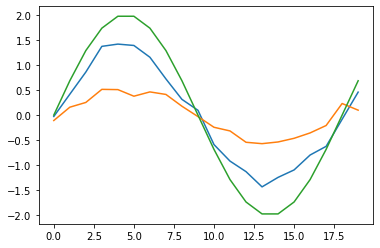

In [ ]:
plt.plot(obs4)
plt.plot(obs)

In [ ]:
obs4.shape

torch.Size([20, 2])

In [ ]:
pred4 = k4.predict(obs4.unsqueeze(0), mask4, torch.zeros(1,n_obs,1))

In [ ]:
pred_df4 = NormalsDf(pd.DataFrame(pred4.mean.squeeze(0), index=time, columns=["var1", "var2"]),
                     pd.DataFrame(pred4.std.squeeze(0).squeeze(-1), index=time, columns=["var1", "var2"])).tidy()

In [ ]:
obs_df4_0 = pd.DataFrame({'time': time, 'var1': obs4[:,0].numpy(),
                        'is_present': mask4[0,:,0].numpy()}).melt(["time", "is_present"]) 
obs_df4_1 = pd.DataFrame({'time': time, 'var2': obs4[:,1].numpy(),
                        'is_present': mask4[0,:,1].numpy()}).melt(["time", "is_present"]) 

In [ ]:
obs_df4 = pd.concat([obs_df4_0, obs_df4_1])

In [ ]:
plot_df4 = pd.merge(obs_df4, pred_df4, on=['time', 'variable'])

In [ ]:
p4 = facet_variable(plot_df4, ys=["value", "mean"], error=True, gap_area=False, props={'width': 350, 'height': 220}, n_cols=1)
p4

alt.VConcatChart(...)

In [ ]:
save_plot(p4, "var_corr")

Path('/home/simone/Documents/uni/Thesis/GPFA_imputation/presentations/plots_18_jan/var_corr.vl.json')

In [ ]:
mask5 = torch.ones(1,n_obs,2, dtype=bool)
mask5[0,11:16,:] = False
mask5

tensor([[[ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [False, False],
         [False, False],
         [False, False],
         [False, False],
         [False, False],
         [ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True]]])

In [ ]:
pred5 = k4.predict(obs4.unsqueeze(0), mask5, torch.zeros(1,n_obs,1))

In [ ]:
pred_df5 = NormalsDf(pd.DataFrame(pred5.mean.squeeze(0), index=time, columns=["var1", "var2"]),
                     pd.DataFrame(pred5.std.squeeze(0).squeeze(-1), index=time, columns=["var1", "var2"])).tidy()

In [ ]:
obs_df5_0 = pd.DataFrame({'time': time, 'var1': obs4[:,0].numpy(),
                        'is_present': mask5[0,:,0].numpy()}).melt(["time", "is_present"]) 
obs_df5_1 = pd.DataFrame({'time': time, 'var2': obs4[:,1].numpy(),
                        'is_present': mask5[0,:,1].numpy()}).melt(["time", "is_present"]) 

In [ ]:
obs_df5 = pd.concat([obs_df5_0, obs_df5_1])

In [ ]:
plot_df5 = pd.merge(obs_df4, pred_df5, on=['time', 'variable'])

In [ ]:
p5 = facet_variable(plot_df5, ys=["value", "mean"], error=True, gap_area=False, props={'width': 350, 'height': 220}, n_cols=1)
p5

alt.VConcatChart(...)

In [ ]:
save_plot(p5, "var_no_corr")

Path('/home/simone/Documents/uni/Thesis/GPFA_imputation/presentations/plots_18_jan/var_no_corr.vl.json')